In [4]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values & Tune different Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For pandas profiling
from pandas_profiling import ProfileReport


Travel Package Purchase Prediction - Problem Statement

Description
Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [5]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

In [6]:
df.shape

(4888, 20)

In [7]:
dic = pd.read_excel("Tourism.xlsx")

In [8]:
dic.shape

(21, 4)

In [9]:
dic.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,Tourism,CustomerID,Unique customer ID
2,NaN,Tourism,ProdTaken,Whether the customer has purchased a package o...
3,NaN,Tourism,Age,Age of customer
4,NaN,Tourism,TypeofContact,How customer was contacted (Company Invited or...


In [10]:
dic = dic.drop(['Unnamed: 0','Unnamed: 1'], axis=1)
dic = dic.drop(0, axis=0)
dic.columns = ['Variable','Description']

In [11]:
dic.sample()

,Variable,Description
9,NumberOfPersonVisiting,Total number of persons planning to take the t...


In [12]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [14]:
df = df.drop(columns='CustomerID')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


In [16]:

# Generating a data frame of missing values by count and %
missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['%'])
missing['count'] = df.isnull().sum()


In [17]:
print('Missing Values in the data frame')
missing.head()

Missing Values in the data frame


,%,count
DurationOfPitch,5.135025,251
MonthlyIncome,4.766776,233
Age,4.623568,226
NumberOfTrips,2.864157,140
NumberOfChildrenVisiting,1.350245,66


In [18]:
print('The count of unique values in the data frame')
df.nunique().sort_values(ascending=False)

The count of unique values in the data frame


MonthlyIncome               2475
Age                           44
DurationOfPitch               34
NumberOfTrips                 12
NumberOfFollowups              6
Designation                    5
PitchSatisfactionScore         5
ProductPitched                 5
NumberOfPersonVisiting         5
MaritalStatus                  4
Occupation                     4
NumberOfChildrenVisiting       4
Gender                         3
PreferredPropertyStar          3
CityTier                       3
Passport                       2
OwnCar                         2
TypeofContact                  2
ProdTaken                      2
dtype: int64

In [19]:
dic.head(21)

,Variable,Description
1,CustomerID,Unique customer ID
2,ProdTaken,Whether the customer has purchased a package o...
3,Age,Age of customer
4,TypeofContact,How customer was contacted (Company Invited or...
5,CityTier,City tier depends on the development of a city...
6,DurationOfPitch,Duration of the pitch by a salesperson to the ...
7,Occupation,Occupation of customer
8,Gender,Gender of customer
9,NumberOfPersonVisiting,Total number of persons planning to take the t...
10,NumberOfFollowups,Total number of follow-ups has been done by sa...


In [20]:
# Printing a list of unique values, values shown in text file. Some categories have a large number of values so dropping those
vc = df.columns.drop(['MonthlyIncome','Age','DurationOfPitch','NumberOfTrips'])
for i in vc:
    print(i,'Has the following Unique Values')
    print(df[i].value_counts().sort_values(ascending=False))
    print('-'*50)

ProdTaken Has the following Unique Values
0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------
TypeofContact Has the following Unique Values
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
CityTier Has the following Unique Values
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Occupation Has the following Unique Values
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Gender Has the following Unique Values
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
NumberOfPersonVisiting Has the following Unique Values
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int

### Data Intial observations
 * CustomerID is redundant with the index
 <br/><br/>
 * The following columns have missing values we will need to fix
    - DurationOfPitch - replace with mean
    - MonthlyIncome - replace with mean
    - Age - replace with mean
    - NumberOfTrips - replace with mode
    - NumberOfChildernVisting - replace with mode
    <br/><br/>
 * The following categorical columns can be dummies
    - TypeofContact
    - Occupation
    - Gender
    - ProductPitched
    - MartialStatus
    - Designation
    <br/><br/>
 * Customer Obeseravation:
    - 50% of customers are between 31 & 44
    - Most pitches are between 9 & 20 minutes, with the average being 15 min
    - 75% of trips have 1 - 3 people, only 25% of trips have 1 person
    - 25% of customers buy on the 1st Follow up, Most customers need 3-4 follow ups
    - No customers will book a property with less than 3 stars
    - 75% of customers take 1 - 4 trips per year
    - 75% of customers do not have passports making most trips local
    - Pitch Satification Score will be interesting during BiVariate Analysis
    - 50% of customers make between 20,300 - 25,600 per month
    <br/><br/>
 * Possible Outliers:
    - DurationOfPitch - max of 127
    - NumberOfTrips - 22 on the High End
    - MonthlyIncome - 98,678 might not be an outlier just a high income
    <br/><br/>
 * General Objservations:
    - roughly 29% of customers were invited the rest self inquired.
    - With that many customers self selecting advertising to select audiences might be a much stronger strategy instead of targeted reach outs.
    - The fast majority of visits are too tier 1 cities just under 2/3rd, with roughly 1/3rd traveling to tier 3 cities. There are almost no trips to tier 2 cities. The company should depri advertising to tier 2 cities
    - Married customers make up almost as much of the population the buys a package as all other categories. Advertising should prioritize married customers
    - The vast majority of packages are purchased by Executives and Managers. Advertising should prioritize these customers
    - The Gender Column has a typo creating an additional "Fe Male" value. 

In [21]:
# Fixing the gender columns
df['Gender'] = df['Gender'].replace(['Fe Male'],'Female')
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [22]:
# Replace missing values
df['DurationOfPitch'].fillna(int(df['DurationOfPitch'].mean()), inplace=True)
df['MonthlyIncome'].fillna(int(df['MonthlyIncome'].mean()), inplace=True)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df['NumberOfTrips'].fillna(int(df['NumberOfTrips'].mode()), inplace=True)
df['NumberOfChildrenVisiting'].fillna(int(df['NumberOfChildrenVisiting'].mode()), inplace=True)

# Drop all rows with missing values left in the data set
df.dropna(inplace=True)

# Checking to make sure all null values have been treated
df.isnull().sum().sort_values(ascending=False)

ProdTaken                   0
PreferredPropertyStar       0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
ProductPitched              0
Age                         0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
MonthlyIncome               0
dtype: int64

## EDA

### Reusable Functions
Reusing functions provided in the class  
Function for both Univariate and Bivariate Analysis

In [23]:
# reusing provided function for generating graphs

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# reusing provided function for generating graphs
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [25]:
# reusing provided function for generating graphs

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

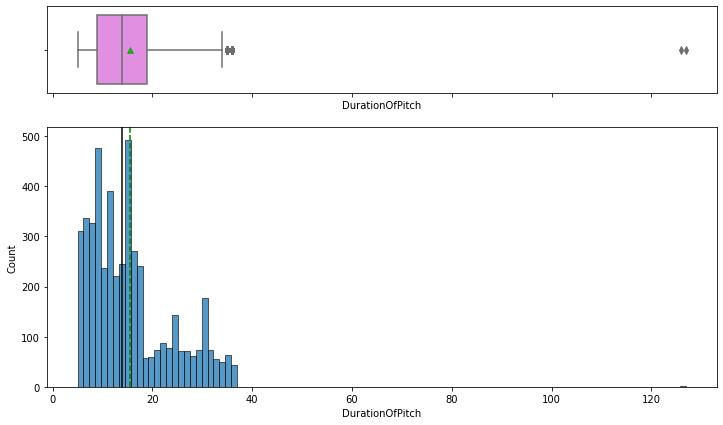

In [26]:
histogram_boxplot(df, 'DurationOfPitch')

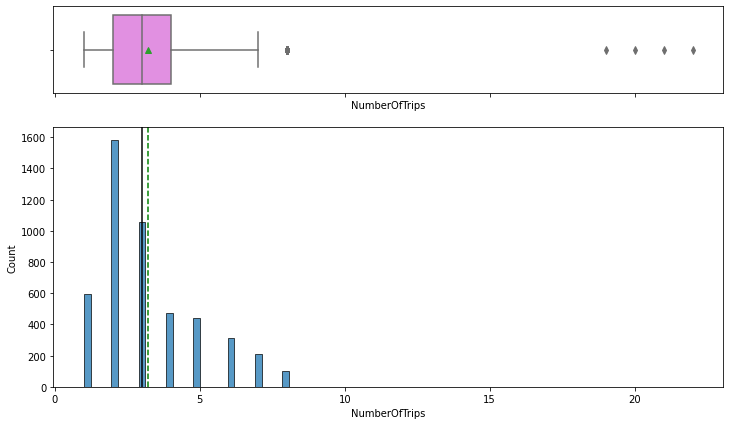

In [27]:
histogram_boxplot(df, 'NumberOfTrips')

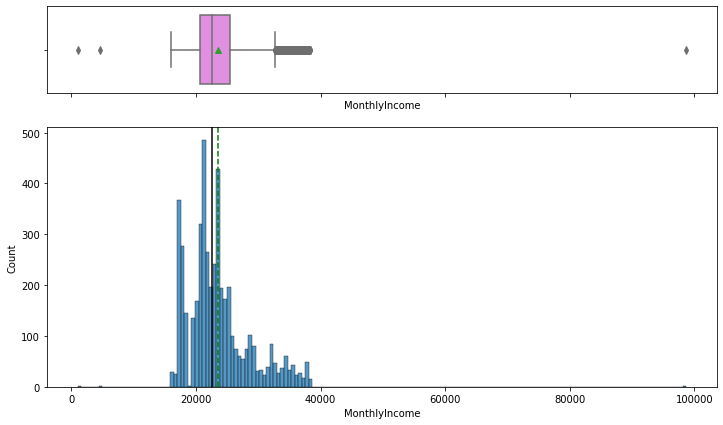

In [28]:
histogram_boxplot(df, 'MonthlyIncome')

Each of these features has a low number of outliers. While some data might be interesting these will skew this model. Dropping all outliers in the data set.

In [29]:
#droping outliers
df.drop(index=df[df.DurationOfPitch>37].index,inplace=True)
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)
df.drop(index=df[df.NumberOfChildrenVisiting>8].index,inplace=True)

In [30]:
df.sample()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
175,0,56.0,Self Enquiry,1,15.0,Salaried,Female,3,3.0,Basic,5.0,Married,5.0,1,4,1,1.0,Executive,23619.0


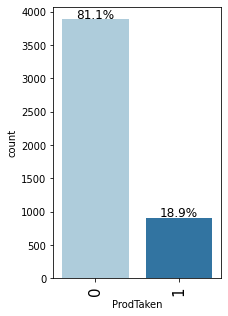

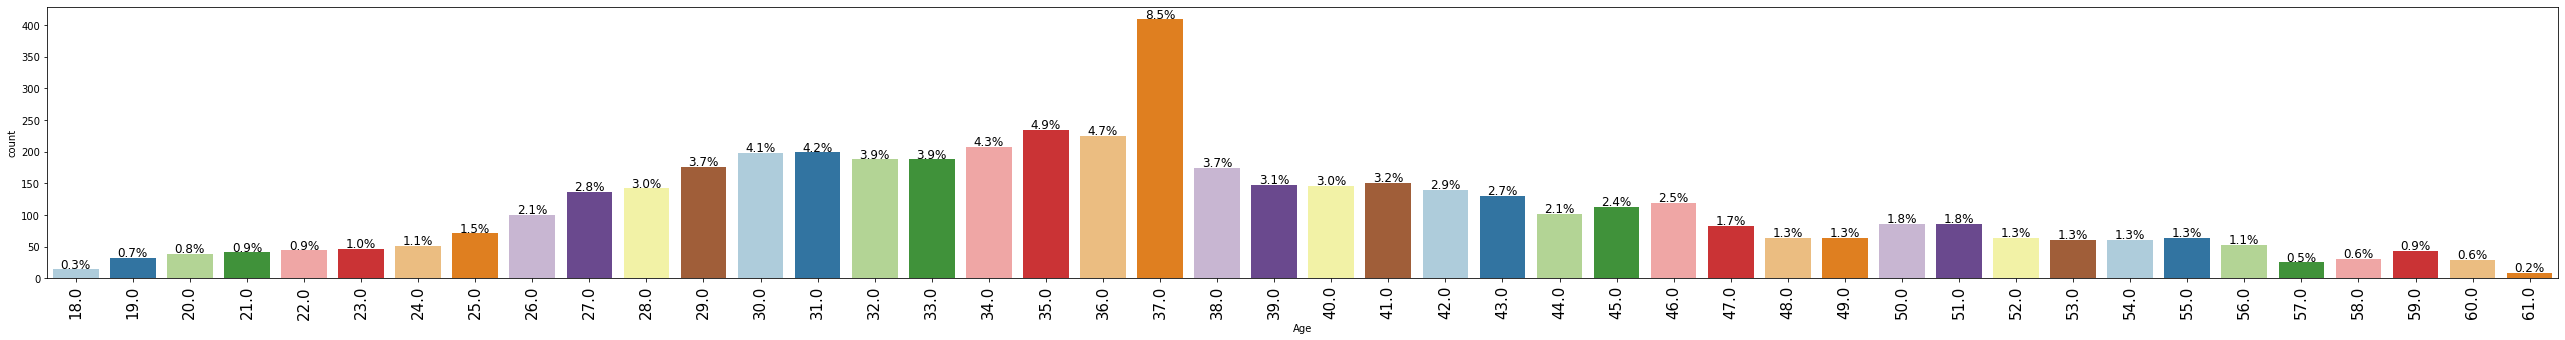

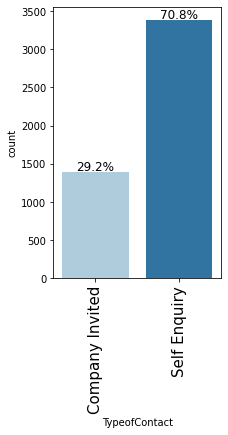

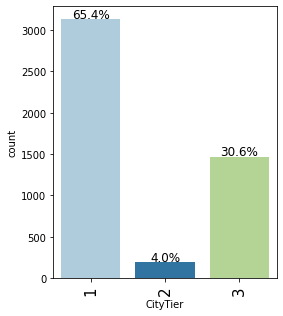

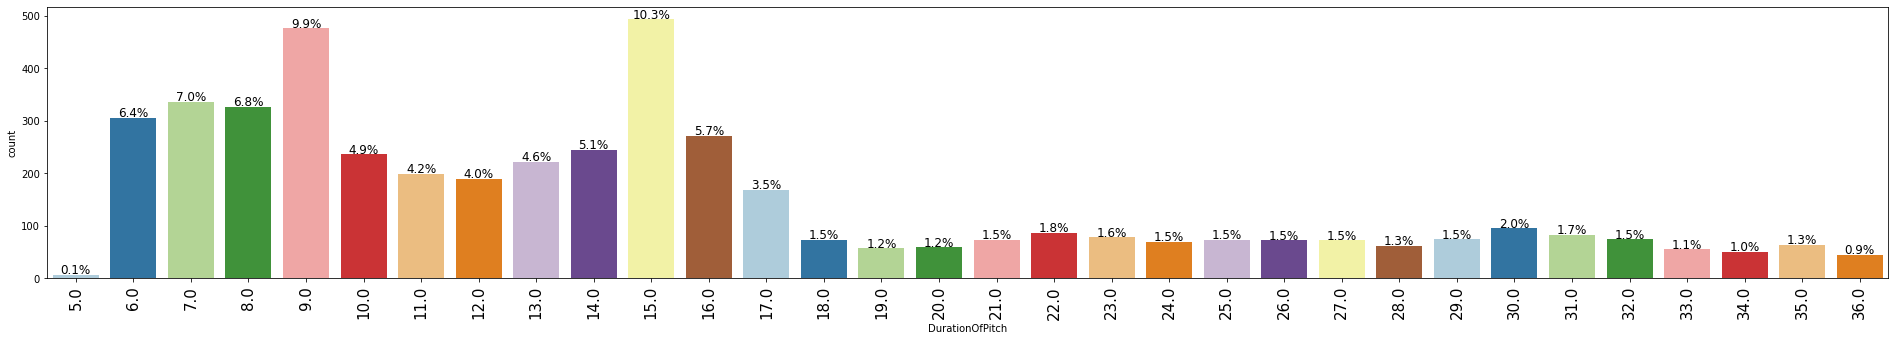

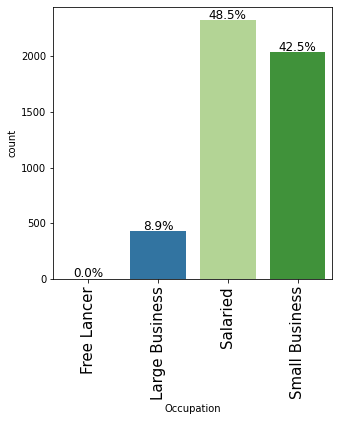

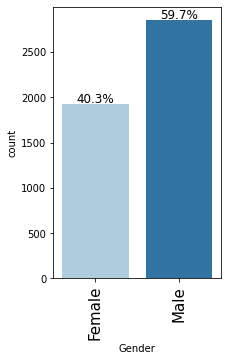

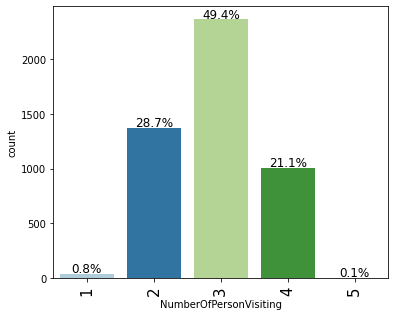

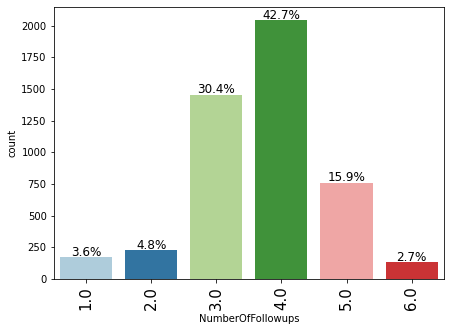

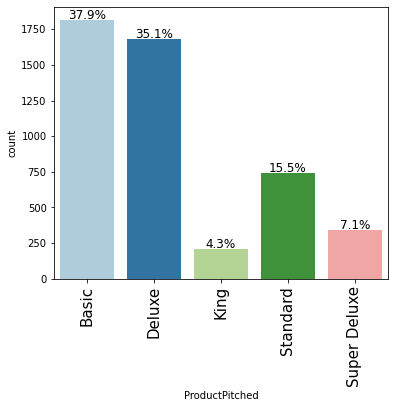

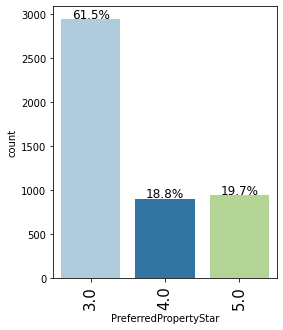

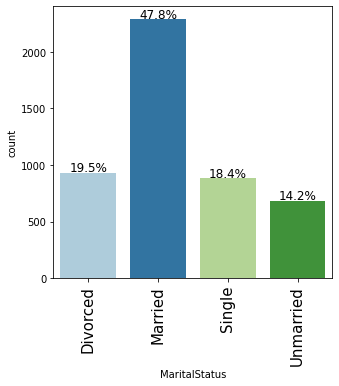

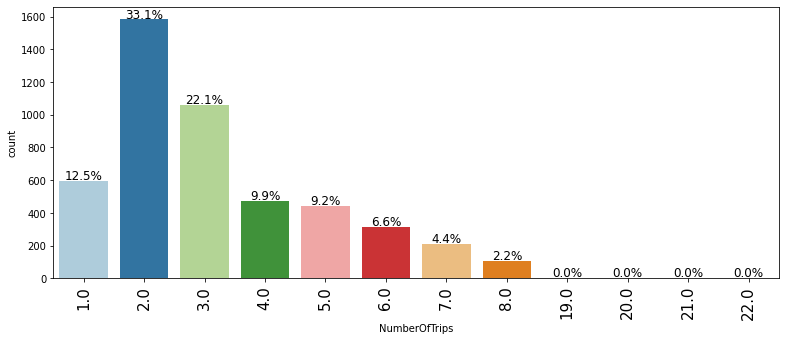

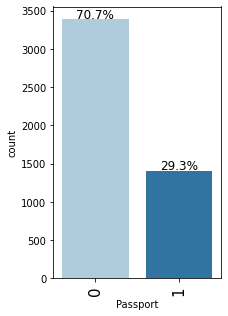

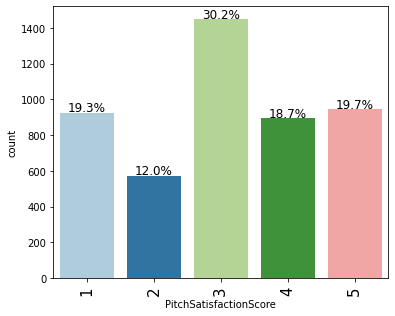

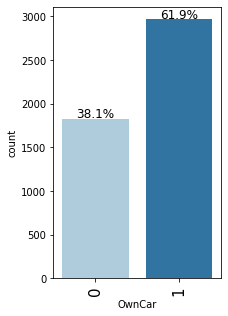

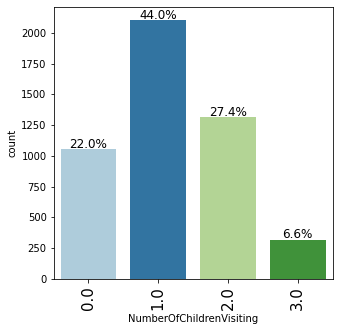

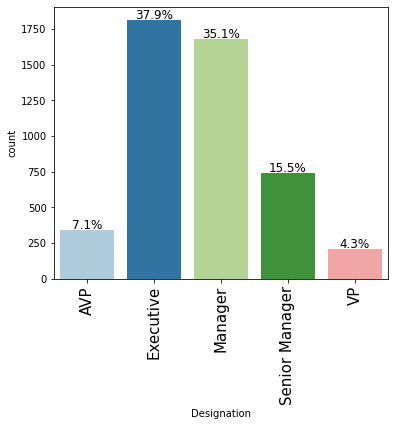

In [31]:
# function to print barplots for all features

plots = df.copy()
plots.drop(columns='MonthlyIncome', axis = 1, inplace=True)

for i in plots:
    labeled_barplot(plots, i, perc=True)

### Bivariate Analysis

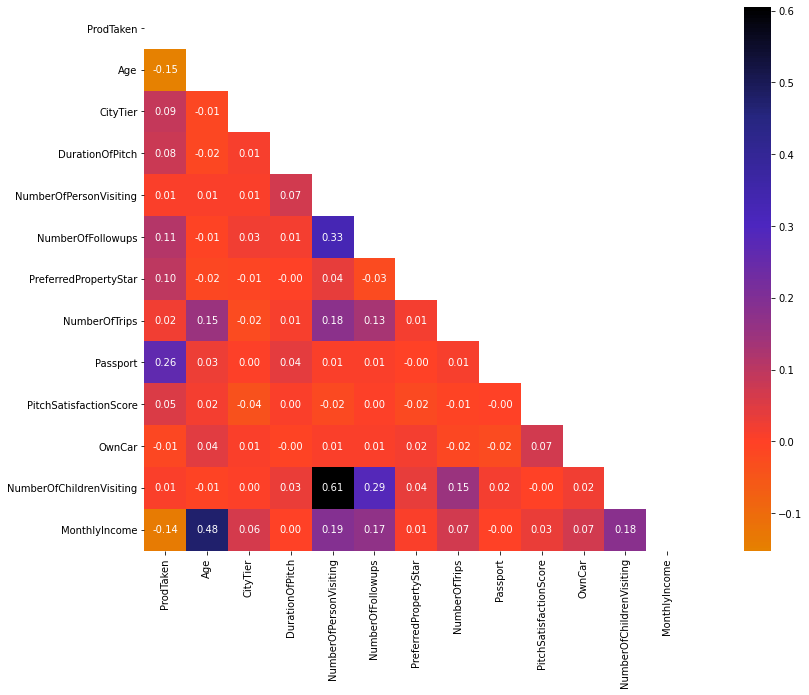

In [32]:
# Generating the lower half a heatmap only
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='CMRmap_r')
plt.show()

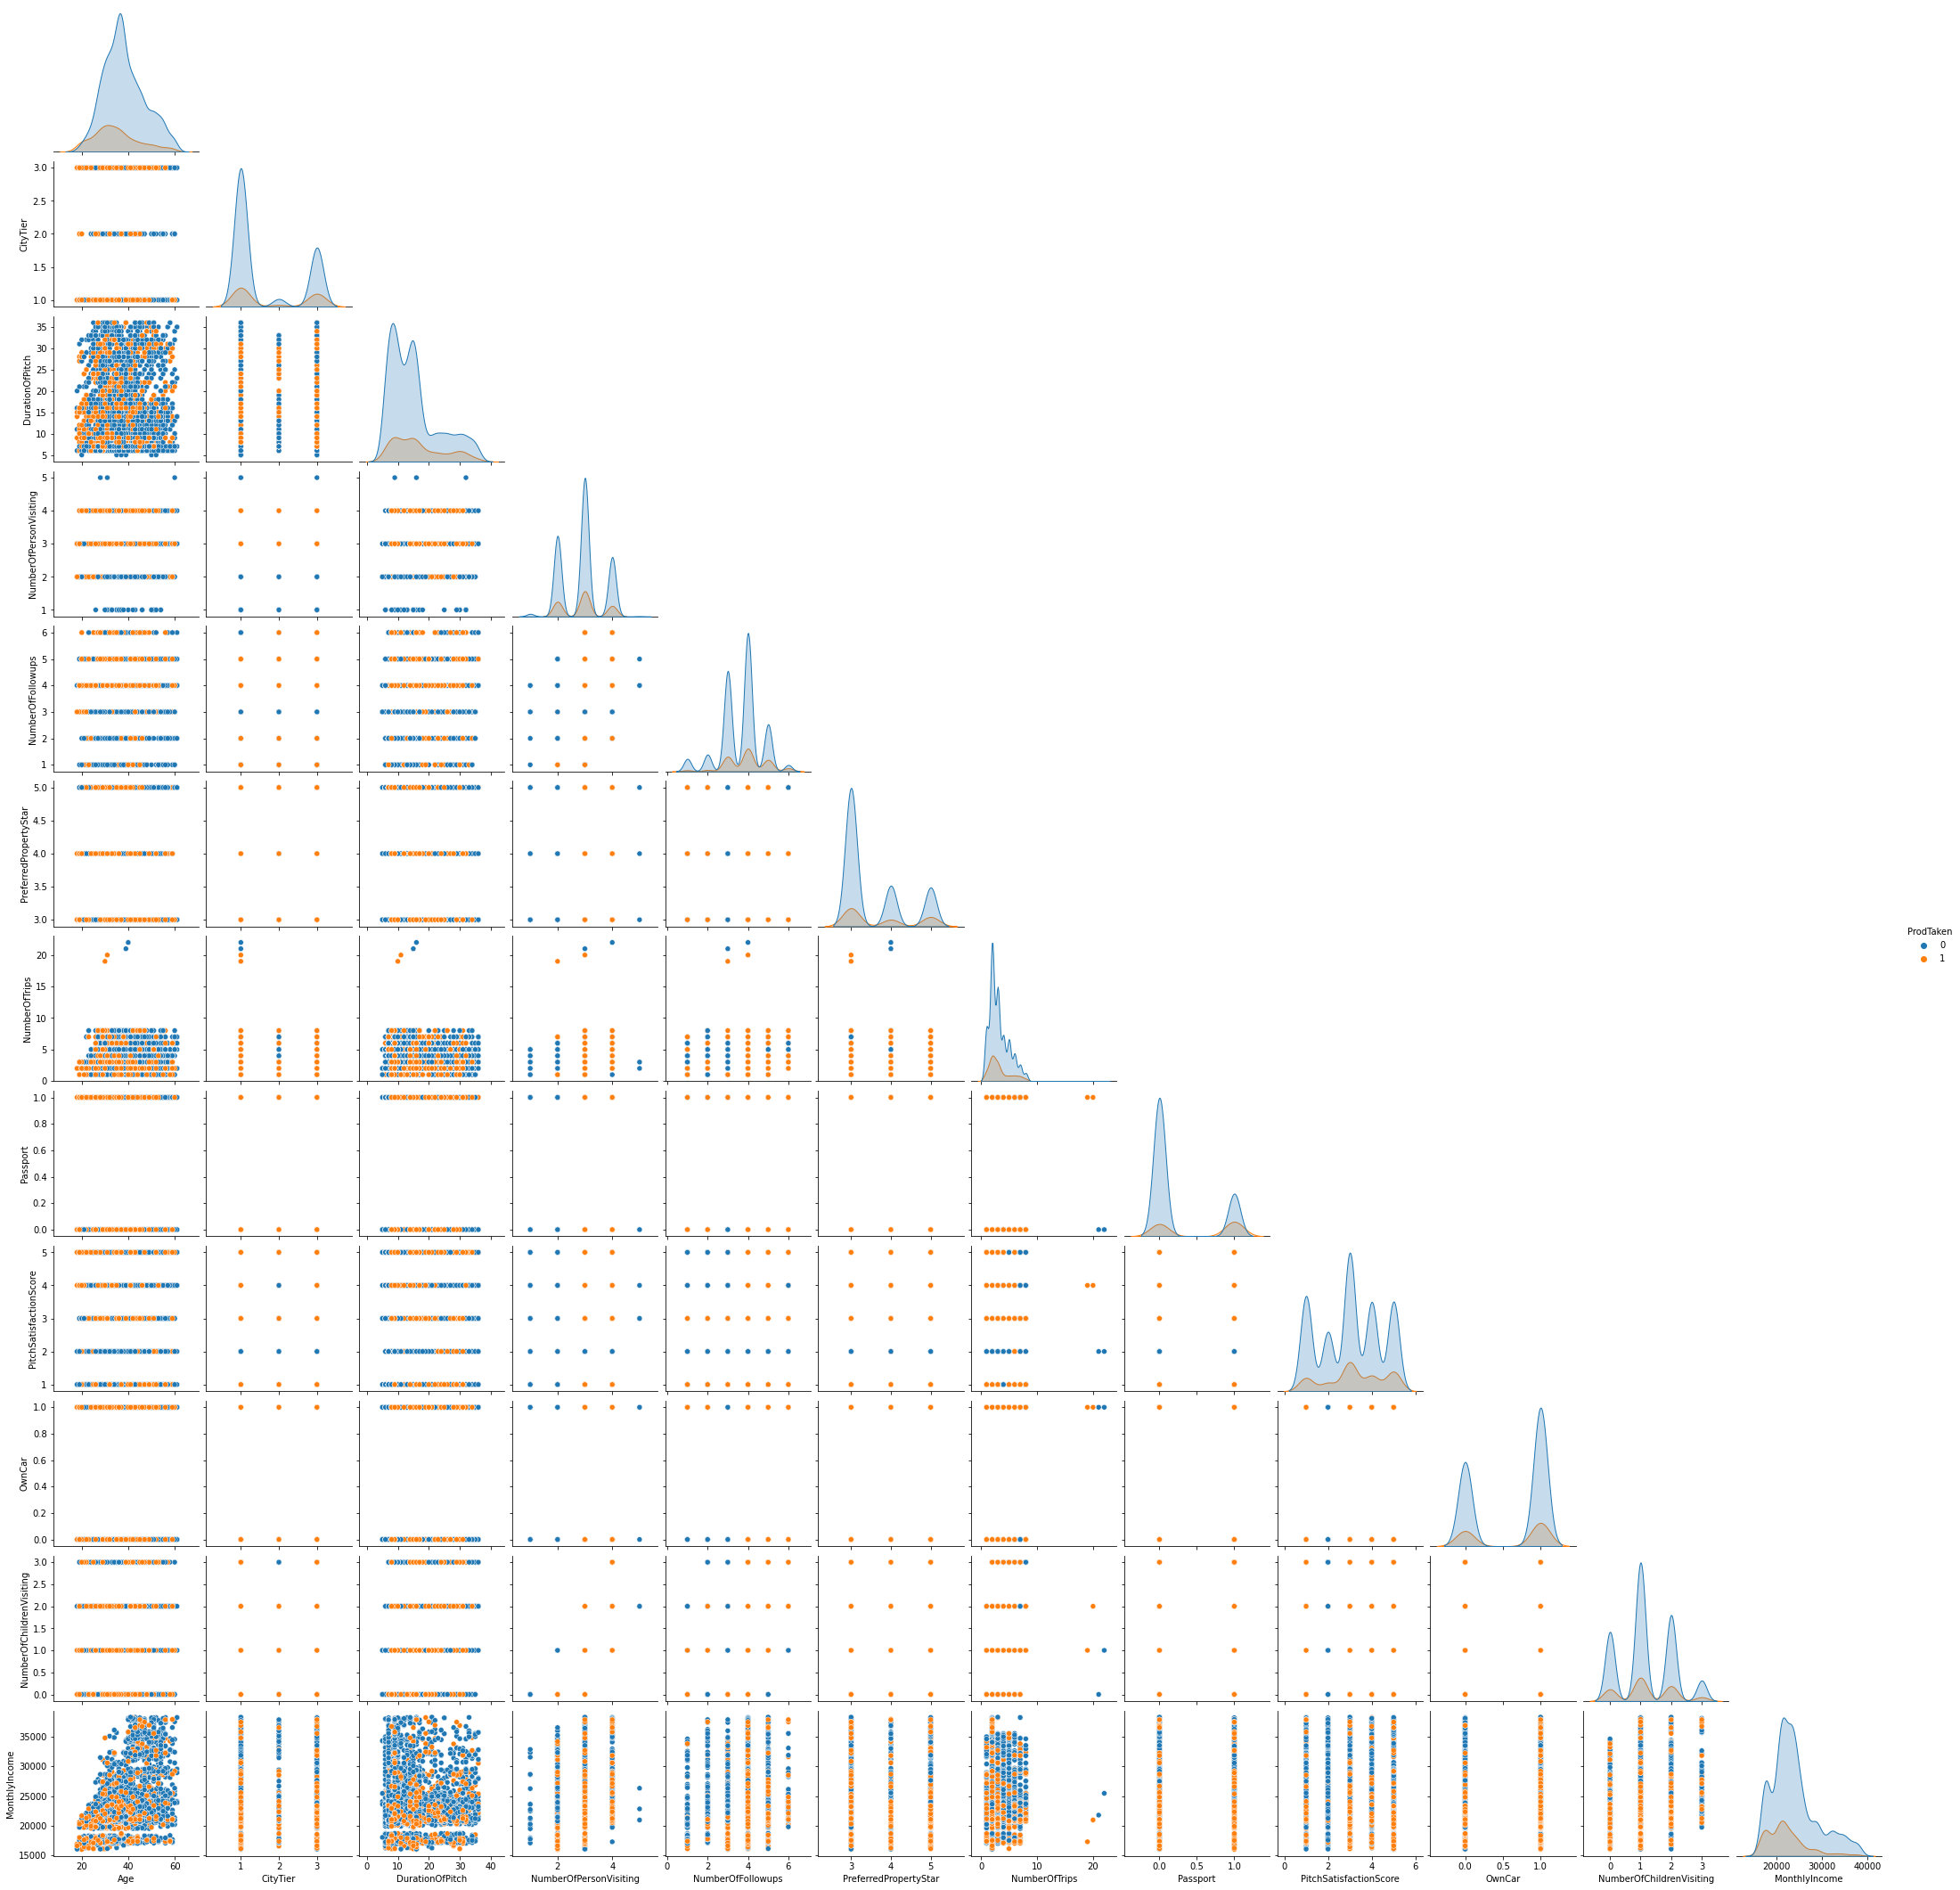

In [33]:
# Generating the lower half a heatmap only
sns.pairplot(df, corner=True, hue='ProdTaken')
plt.show()

Bar Charts for all features in relation to ProdTaken
ProdTaken     0    1   All
ProdTaken                 
1             0  903   903
All        3884  903  4787
0          3884    0  3884
------------------------------------------------------------------------------------------------------------------------


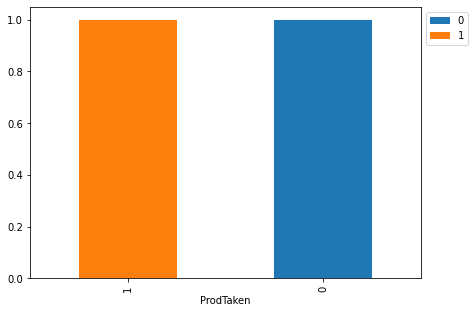

ProdTaken     0    1   All
Age                       
All        3884  903  4787
37.0        341   68   409
29.0        119   57   176
30.0        150   48   198
34.0        164   44   208
31.0        158   41   199
33.0        148   40   188
32.0        150   38   188
26.0         65   35   100
35.0        200   34   234
27.0        106   30   136
36.0        198   27   225
20.0         13   25    38
41.0        127   24   151
28.0        118   24   142
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
42.0        120   20   140
25.0         52   19    71
45.0         95   18   113
24.0         33   18    51
51.0         69   17    86
44.0         85   17   102
38.0        160   15   175
22.0         29   15    44
39.0        134   14   148
23.0         33   13    46
59.0         31   12    43
47.0         71   12    83
50.0         74   12    86
58.0         20   11    31
52.0         53   11    64
48.0         53   11    64
46.0        108   11   119
4

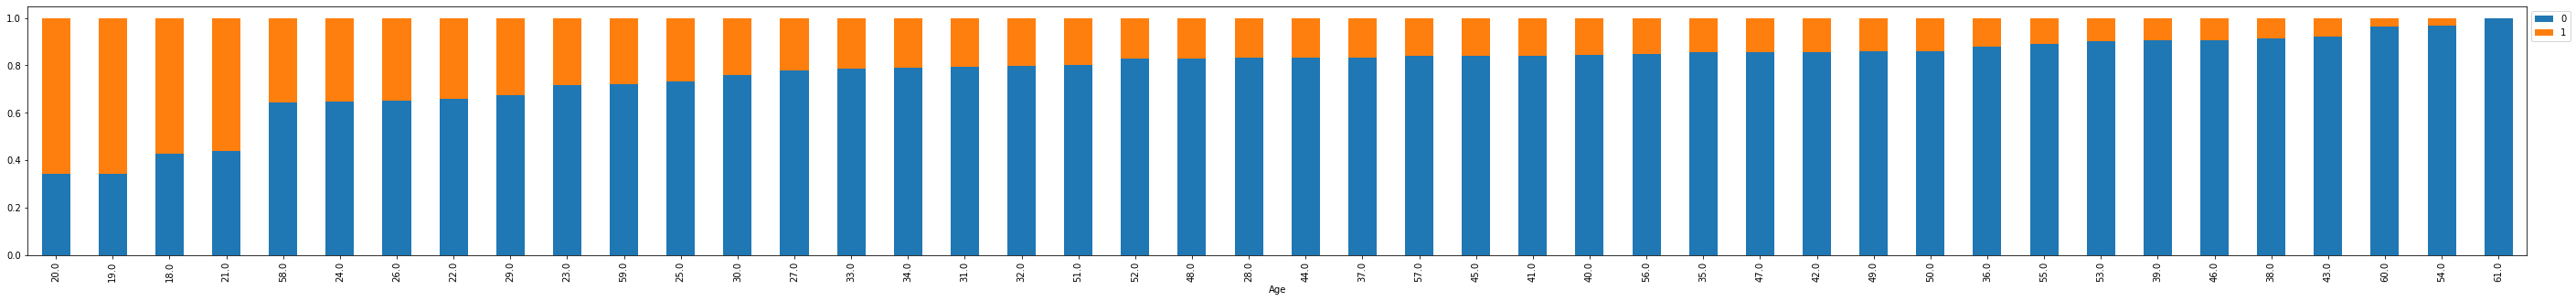

ProdTaken           0    1   All
TypeofContact                   
All              3884  903  4787
Self Enquiry     2792  597  3389
Company Invited  1092  306  1398
------------------------------------------------------------------------------------------------------------------------


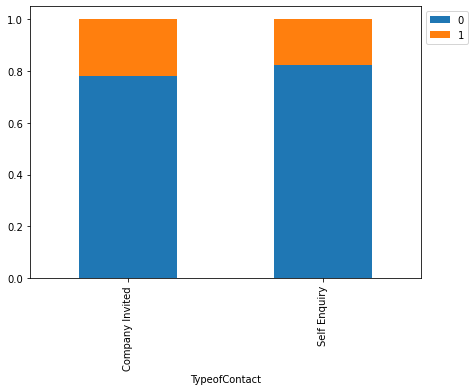

ProdTaken     0    1   All
CityTier                  
All        3884  903  4787
1          2620  510  3130
3          1119  347  1466
2           145   46   191
------------------------------------------------------------------------------------------------------------------------


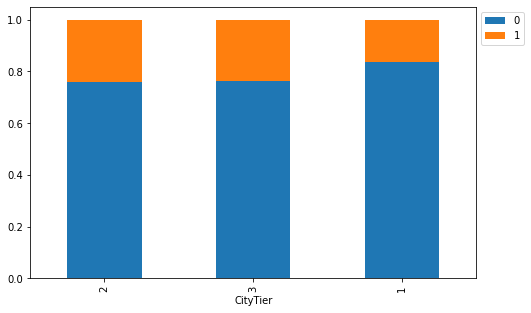

ProdTaken           0    1   All
DurationOfPitch                 
All              3884  903  4787
15.0              400   93   493
9.0               401   75   476
8.0               267   60   327
16.0              215   56   271
7.0               289   47   336
10.0              191   45   236
6.0               266   39   305
14.0              206   39   245
11.0              162   37   199
12.0              157   33   190
13.0              189   32   221
31.0               52   31    83
30.0               65   30    95
17.0              145   24   169
22.0               64   23    87
29.0               53   21    74
19.0               36   21    57
23.0               58   20    78
18.0               54   19    73
20.0               42   17    59
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

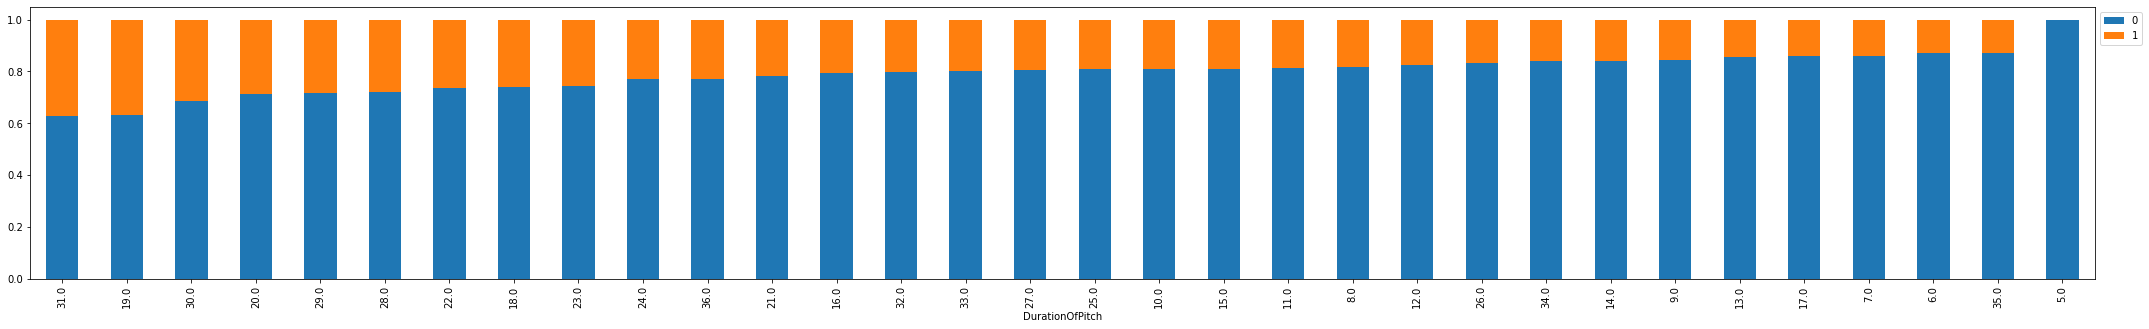

ProdTaken          0    1   All
Occupation                     
All             3884  903  4787
Salaried        1917  407  2324
Small Business  1659  374  2033
Large Business   308  120   428
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


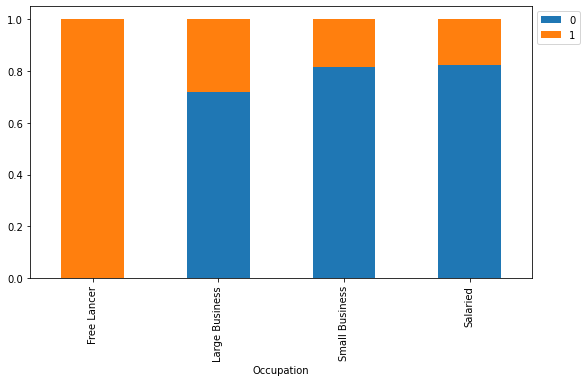

ProdTaken     0    1   All
Gender                    
All        3884  903  4787
Male       2289  568  2857
Female     1595  335  1930
------------------------------------------------------------------------------------------------------------------------


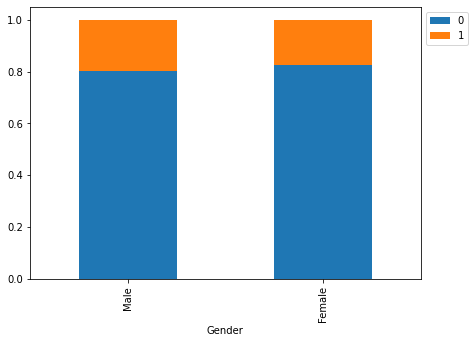

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3884  903  4787
3                       1912  451  2363
2                       1112  263  1375
4                        820  189  1009
1                         37    0    37
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


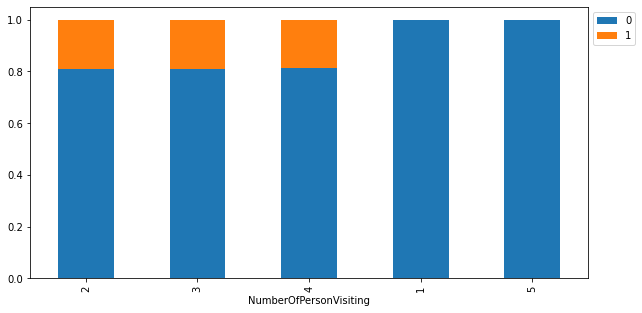

ProdTaken             0    1   All
NumberOfFollowups                 
All                3884  903  4787
4.0                1669  375  2044
3.0                1212  242  1454
5.0                 569  190   759
6.0                  78   52   130
2.0                 204   24   228
1.0                 152   20   172
------------------------------------------------------------------------------------------------------------------------


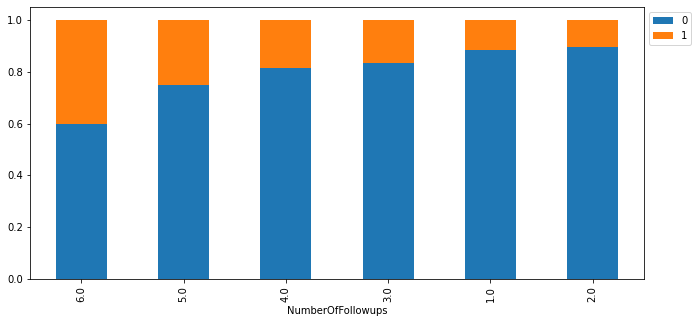

ProdTaken          0    1   All
ProductPitched                 
All             3884  903  4787
Basic           1270  545  1815
Deluxe          1483  199  1682
Standard         618  123   741
Super Deluxe     322   20   342
King             191   16   207
------------------------------------------------------------------------------------------------------------------------


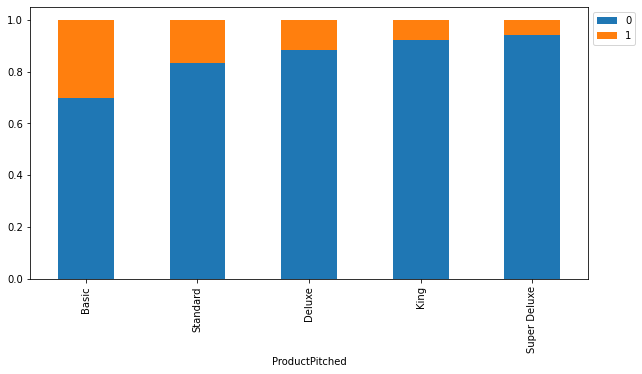

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3884  903  4787
3.0                    2465  479  2944
5.0                     694  247   941
4.0                     725  177   902
------------------------------------------------------------------------------------------------------------------------


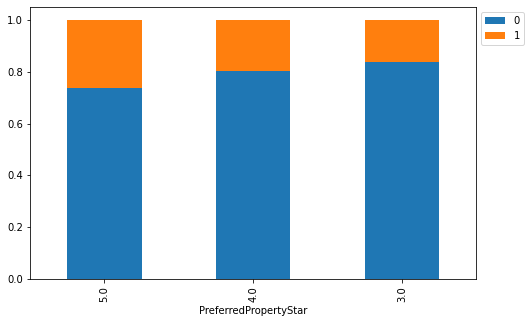

ProdTaken         0    1   All
MaritalStatus                 
All            3884  903  4787
Married        1968  322  2290
Single          587  296   883
Unmarried       516  166   682
Divorced        813  119   932
------------------------------------------------------------------------------------------------------------------------


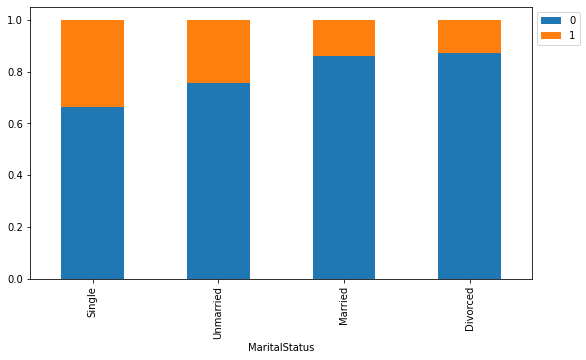

ProdTaken         0    1   All
NumberOfTrips                 
All            3884  903  4787
2.0            1272  311  1583
3.0             847  211  1058
1.0             490  108   598
6.0             252   64   316
5.0             381   61   442
4.0             413   59   472
7.0             152   58   210
8.0              75   29   104
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
------------------------------------------------------------------------------------------------------------------------


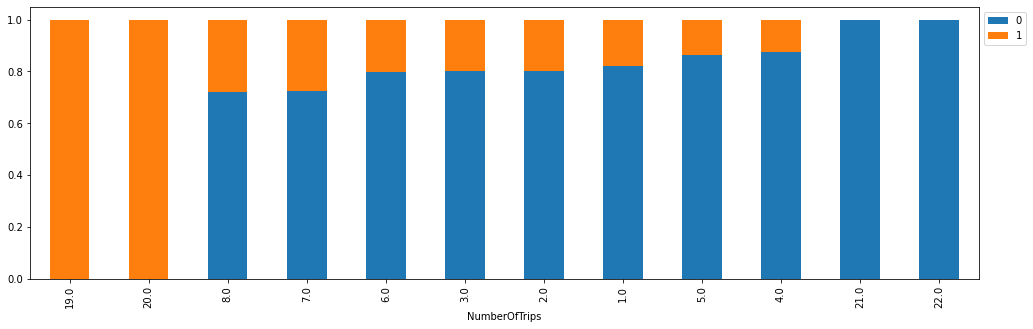

ProdTaken     0    1   All
Passport                  
All        3884  903  4787
1           914  489  1403
0          2970  414  3384
------------------------------------------------------------------------------------------------------------------------


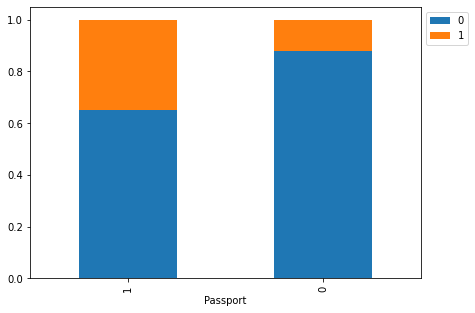

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3884  903  4787
3                       1140  308  1448
5                        738  207   945
4                        734  161   895
1                        784  141   925
2                        488   86   574
------------------------------------------------------------------------------------------------------------------------


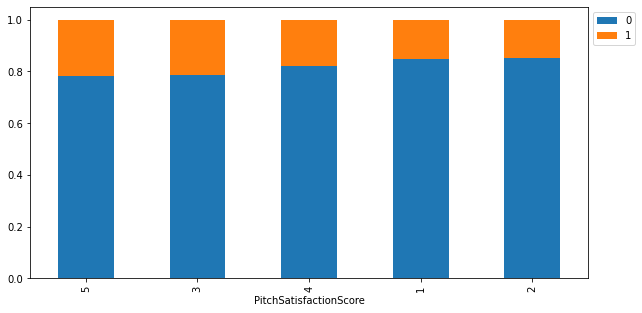

ProdTaken     0    1   All
OwnCar                    
All        3884  903  4787
1          2416  547  2963
0          1468  356  1824
------------------------------------------------------------------------------------------------------------------------


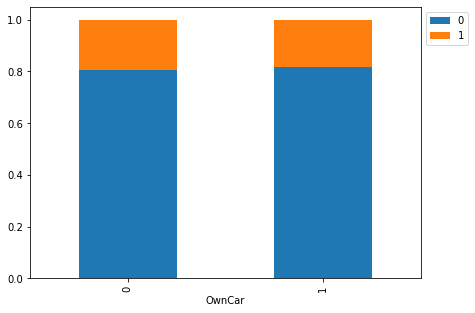

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3884  903  4787
1.0                       1712  392  2104
2.0                       1063  250  1313
0.0                        855  197  1052
3.0                        254   64   318
------------------------------------------------------------------------------------------------------------------------


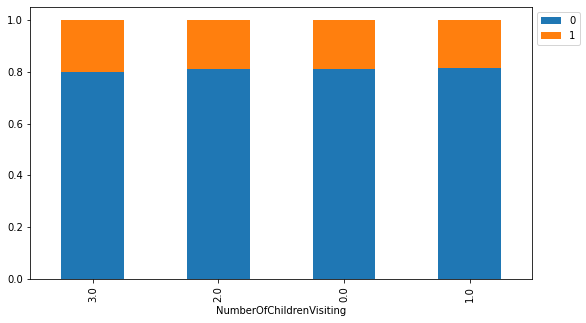

ProdTaken          0    1   All
Designation                    
All             3884  903  4787
Executive       1270  545  1815
Manager         1483  199  1682
Senior Manager   618  123   741
AVP              322   20   342
VP               191   16   207
------------------------------------------------------------------------------------------------------------------------


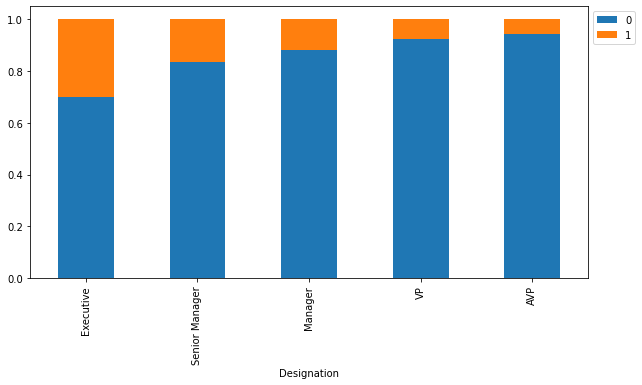

In [34]:
print('Bar Charts for all features in relation to ProdTaken')
for i in plots:
    stacked_barplot(plots, i, "ProdTaken" )

### Customer Profiles

In [35]:
df[(df['ProductPitched']=='Basic') & (df['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,545.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,545.0,NaN,NaN,NaN,31.607339,8.803405,18.0,26.0,30.0,37.0,59.0
TypeofContact,545,2,Self Enquiry,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,545.0,NaN,NaN,NaN,1.510092,0.831585,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,545.0,NaN,NaN,NaN,15.768807,7.799754,6.0,9.0,14.0,22.0,36.0
Occupation,545,4,Salaried,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,545,2,Male,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,545.0,NaN,NaN,NaN,2.908257,0.703736,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,545.0,NaN,NaN,NaN,3.954128,0.968106,1.0,3.0,4.0,5.0,6.0
ProductPitched,545,1,Basic,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Lets create specific data frames for each profile

profiles = df.copy()
profiles.drop(profiles[profiles.ProdTaken == 0].index, inplace = True)     

basic = profiles.copy()   # new data frame to create a profile for customers of the basic product
standard = profiles.copy()   # new data frame to create a profile for customers of the standard product
deluxe = profiles.copy()   # new data frame to create a profile for customers of the deluxe product
superDeluxe = profiles.copy()   # new data frame to create a profile for customers of the superDeluxe product
king = profiles.copy()   # new data frame to create a profile for customers of the king product

basic.drop(basic[basic.ProductPitched != 'Basic'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
standard.drop(standard[standard.ProductPitched != 'Standard'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
deluxe.drop(deluxe[deluxe.ProductPitched != 'Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
superDeluxe.drop(superDeluxe[superDeluxe.ProductPitched != 'Super Deluxe'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition
king.drop(king[king.ProductPitched != 'King'].index, inplace = True)   # drop all values in Product Pitches that do meet the desired condition

In [37]:
basic.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,545.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,545.0,31.607339,8.803405,18.0,26.0,30.0,37.0,59.0
CityTier,545.0,1.510092,0.831585,1.0,1.0,1.0,2.0,3.0
DurationOfPitch,545.0,15.768807,7.799754,6.0,9.0,14.0,22.0,36.0
NumberOfPersonVisiting,545.0,2.908257,0.703736,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,545.0,3.954128,0.968106,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,545.0,3.772477,0.863674,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,545.0,3.209174,2.071406,1.0,2.0,3.0,3.0,20.0
Passport,545.0,0.587156,0.492798,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,545.0,3.211009,1.353599,1.0,2.0,3.0,4.0,5.0



##### Basic Package Customer Profile  Analysis

1) Basic is our most populare product and makes up over half of our sales <br>
2) The largest range of customers is between 25 - 35 <br>
3) Most customers will visit tier 1 & 2 citites <br>
4) Most customers will need a pitch of less than 22 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 16,000 & 21400 <br>
7) Executives are the only customers picking this package <br>
8) Around 70% of customers were self initiated <br>
--------------------------------------------------

In [38]:
standard.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,123.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,123.0,40.845528,9.775373,19.0,33.0,38.0,49.0,60.0
CityTier,123.0,2.089431,0.966726,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,123.0,19.000000,9.049047,6.0,11.0,17.0,29.0,36.0
NumberOfPersonVisiting,123.0,2.959350,0.705928,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,123.0,3.934959,0.912031,1.0,3.0,4.0,4.5,6.0
PreferredPropertyStar,123.0,3.731707,0.878460,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,123.0,3.000000,1.815236,1.0,2.0,2.0,3.5,8.0
Passport,123.0,0.382114,0.487892,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,123.0,3.455285,1.307306,1.0,3.0,3.0,5.0,5.0


##### Standard Package Customer Profile Analysis
1) Standard is our 3rd product in popularity <br>
2) The largest range of customers is between 33 - 49 <br>
3) Customers visit all tiers of cities <br>
4) Most customers will need a pitch of less than 29 minutes <br>
5) On average it will take 4 follow ups to close the date <br>
6) Most customers have a monthly income between 23,900 to 29000 <br>
7) Senior Managers are the only customers picking this package <br>
8) Roughly 75% of customers were self inquiries <br>
--------------------------------------------------

In [39]:
deluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,199.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,199.0,37.522613,8.177837,21.0,32.0,36.0,42.5,59.0
CityTier,199.0,2.427136,0.906468,1.0,1.0,3.0,3.0,3.0
DurationOfPitch,199.0,18.417085,8.628231,6.0,12.0,15.0,25.0,36.0
NumberOfPersonVisiting,199.0,2.954774,0.705652,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,199.0,3.964824,1.051103,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,199.0,3.683417,0.855922,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,199.0,3.713568,2.023440,1.0,2.0,3.0,5.0,8.0
Passport,199.0,0.502513,0.501255,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,199.0,3.055276,1.283918,1.0,2.0,3.0,4.0,5.0


##### Deluxe Package Customer Profile Analysis

1) Deluxe is our 2nd most populare product making up over 20% of our sales <br>
2) The largest range of customers is between 32 - 44 <br>
3) Most customers will visit all tires of cities <br>
4) Most customers will need a pitch of less than 28 minutes <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 20,500 & 24,500 <br>
7) Managers are the only customers picking this package <br>
8) Roughly 70% of customers were self inquiries <br>
--------------------------------------------------

In [40]:
superDeluxe.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,20.0,1.0,0.000000,1.0,1.0,1.0,1.00,1.0
Age,20.0,43.5,4.839530,39.0,40.0,42.0,45.25,56.0
CityTier,20.0,2.6,0.820783,1.0,3.0,3.0,3.00,3.0
DurationOfPitch,20.0,18.5,7.330542,8.0,15.0,18.5,20.00,31.0
NumberOfPersonVisiting,20.0,2.7,0.656947,2.0,2.0,3.0,3.00,4.0
NumberOfFollowups,20.0,3.1,1.618967,1.0,2.0,3.0,4.00,6.0
PreferredPropertyStar,20.0,3.6,0.820783,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,20.0,3.2,2.440880,1.0,1.0,2.0,5.25,8.0
Passport,20.0,0.6,0.502625,0.0,0.0,1.0,1.00,1.0
PitchSatisfactionScore,20.0,3.8,1.005249,3.0,3.0,3.0,5.00,5.0


##### Super Deluxe Package Customer Profile Analysis

1) Very few customers pick the Super Deluxe Package <br>
2) The largest range of customers is between 40 - 45 <br>
3) Most customers will only almost exclusively visit tier 3 cities <br>
4) Most customers will need a pitch of less than 20 minutes <br>
5) On average it will take 3 follow ups to close the deal <br>
6) Most customers have a monthly income between 28,000 - 32,000 <br>
7) AVPs are the only customers picking this package <br>
8) 80% of customers were company invited <br>

--------------------------------------------------

In [41]:
king.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,16.0,1.0000,0.000000,1.0,1.00,1.0,1.00,1.0
Age,16.0,47.5000,10.302103,27.0,41.75,49.0,55.75,59.0
CityTier,16.0,1.7500,1.000000,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,16.0,10.8750,4.573474,8.0,8.00,8.5,11.25,19.0
NumberOfPersonVisiting,16.0,2.7500,0.683130,2.0,2.00,3.0,3.00,4.0
NumberOfFollowups,16.0,4.1250,1.087811,3.0,3.00,4.0,5.00,6.0
PreferredPropertyStar,16.0,3.7500,0.683130,3.0,3.00,4.0,4.00,5.0
NumberOfTrips,16.0,2.7500,1.483240,1.0,2.00,2.0,3.00,6.0
Passport,16.0,0.6250,0.500000,0.0,0.00,1.0,1.00,1.0
PitchSatisfactionScore,16.0,3.5625,1.152895,1.0,3.00,3.5,4.25,5.0


##### King Package Customer Profile Analysis
1) Very few customers pick the King package <br>
2) The largest range of customers is between 42 - 46 <br>
3) 50% of customers will visit tier 1 cities <br>
4) Most customers will need a pitch of less than 9 minutes making them group with lowest pitch <br>
5) On average it will take 4 follow ups to close the deal <br>
6) Most customers have a monthly income between 34,400 - 38,000 <br>
7) VPs are the only customers picking this package <br>
8) All customers were self inquires  <br>

--------------------------------------------------

### Splitting the data sets to prepare for models

In [55]:
# creating a new data frame, dropping the customer interaction data and generating dummies 
df1 = df.copy()
df1.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)
df1 = pd.get_dummies(df1, columns=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier'], drop_first=True)
df1.head()

,ProdTaken,Age,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,...,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,CityTier_2,CityTier_3
0,1,41.0,3,3.0,1.0,1,1,0.0,20993.0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,49.0,3,4.0,2.0,0,1,2.0,20130.0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,37.0,3,3.0,7.0,1,0,0.0,17090.0,1,...,1,0,1,0,1,0,0,0,0,0
3,0,33.0,2,3.0,2.0,1,1,1.0,17909.0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,37.0,2,4.0,1.0,0,1,0.0,18468.0,1,...,1,0,0,0,1,0,0,0,0,0


In [58]:
#seperating target and independant variables and splitting the data set into train and test
X = df1.drop(columns='ProdTaken')
Y = df1['ProdTaken']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")
print("---------------------------------------")
print("")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3350, 22)
Shape of test set :  (1437, 22)

---------------------------------------

Percentage of classes in training set:
0    0.811343
1    0.188657
Name: ProdTaken, dtype: float64

---------------------------------------

Percentage of classes in test set:
0    0.811413
1    0.188587
Name: ProdTaken, dtype: float64


### Repeatable Functions
* reusing functions from class

In [43]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [44]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Bagging Model Building

##### Decision Trees

,Accuracy,Recall,Precision,F1
DTree Training,1.000000,1.000000,1.000000,1.000000
DTree Test,0.864997,0.656827,0.637993,0.647273


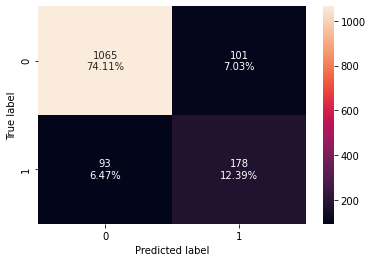

In [101]:
# Decision Tree

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

dtree_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
dtree_test_perf = model_performance_classification_sklearn(dtree, X_test, y_test)
dtree_compare = dtree_train_perf.append(dtree_test_perf, ignore_index=True)
dtree_compare.index = ['DTree Training','DTree Test']

confusion_matrix_sklearn(dtree, X_test, y_test)
dtree_compare.head()

The model looks to be overfitting bassed up on metrics, lets try tuning the model

In [92]:
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.2, 1:0.8}, random_state=1)

dtree_parameters = {'max_depth': np.arange(2,10), 'min_samples_leaf': [1, 2, 5, 7], 'max_leaf_nodes': [2, 3, 5, 10], 'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]}
scorer = metrics.make_scorer(metrics.recall_score)

dtree_grid_search = GridSearchCV(dtree_tuned, dtree_parameters, scoring = scorer, n_jobs = -1)
dtree_grid_search = dtree_grid_search.fit(X_train, y_train)

dtree_tuned = grid_search.best_estimator_
dtree_tuned.fit(X_train, y_train)



DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, random_state=1)

,Accuracy,Recall,Precision,F1
DTree Training,1.000000,1.000000,1.000000,1.000000
DTree Test,0.864997,0.656827,0.637993,0.647273
DTree Tuned Training,0.766866,0.645570,0.422798,0.510958
DTree Tuned Test,0.748782,0.634686,0.396313,0.487943


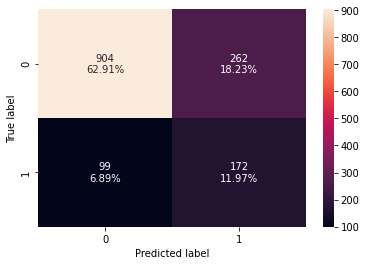

In [102]:
y_train_prediction_dtree_tuned = dtree_tuned.predict(X_train)

confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

#Calculating different metrics
dtree_train_perf_tuned = model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
dtree_test_perf_tuned = model_performance_classification_sklearn(dtree_tuned,X_test,y_test)

dtree_compare = dtree_compare.append(dtree_train_perf_tuned, ignore_index=True)
dtree_compare = dtree_compare.append(dtree_test_perf_tuned, ignore_index=True)
dtree_compare.index = ['DTree Training','DTree Test','DTree Tuned Training', 'DTree Tuned Test']

dtree_compare.head()

##### Random Forest

,Accuracy,Recall,Precision,F1
RF Training,1.000000,1.000000,1.000000,1.000000
RF Test,0.887265,0.479705,0.860927,0.616114


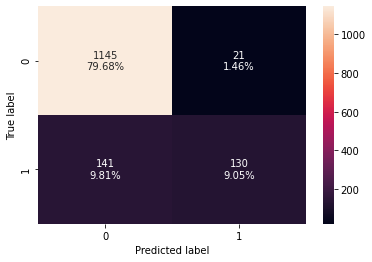

In [105]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

rf_train_perf = model_performance_classification_sklearn(rf, X_train, y_train)
rf_test_perf = model_performance_classification_sklearn(rf, X_test, y_test)

confusion_matrix_sklearn(rf, X_test, y_test)

rf_compare = rf_train_perf.append(rf_test_perf, ignore_index=True)
rf_compare.index = ['RF Training','RF Test']

rf_compare.head()

* model is overfitting lets tyring tunning

In [94]:
#tuning the Random Forest Model
rf_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.2}, random_state=1, oob_score=True, bootstrap=True)
rf_parameters = {'max_depth': list(np.arange(5,30,5)) + [None], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': np.arange(1,15,5), 'min_samples_split': np.arange(2,20,5), 'n_estimators': np.arange(10,110,10)}

rf_grid_search = GridSearchCV(rf_tuned, rf_parameters, scoring='recall', cv=5, n_jobs=-1)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

rf_tuned = rf_grid_search.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.2}, max_depth=20,
                       max_features=None, n_estimators=70, oob_score=True,
                       random_state=1)

,Accuracy,Recall,Precision,F1
RF Training,1.000000,1.000000,1.000000,1.000000
RF Test,0.887265,0.479705,0.860927,0.616114
RF Tuned Training,0.999701,0.998418,1.000000,0.999208
RF Tuned Test,0.915101,0.645756,0.870647,0.741525


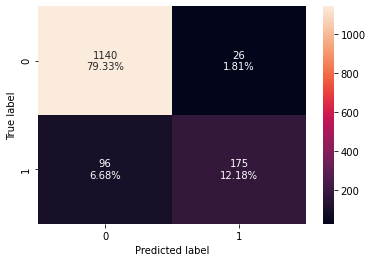

In [106]:
rf_train_perf_tuned = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_test_perf_tuned = model_performance_classification_sklearn(rf_tuned, X_test, y_test)

rf_compare = rf_compare.append(rf_train_perf_tuned, ignore_index=True)
rf_compare = rf_compare.append(rf_test_perf_tuned, ignore_index=True)
rf_compare.index = ['RF Training','RF Test','RF Tuned Training', 'RF Tuned Test']

confusion_matrix_sklearn(rf_tuned,X_test,y_test)

rf_compare.head()

Recall and F1 are better between the tuned and test sets but are still bad numbers  

##### Bagging Classifiers

,Accuracy,Recall,Precision,F1
Bagging Training,0.990149,0.954114,0.99341,0.973366
Bagging Test,0.888657,0.538745,0.80663,0.646018


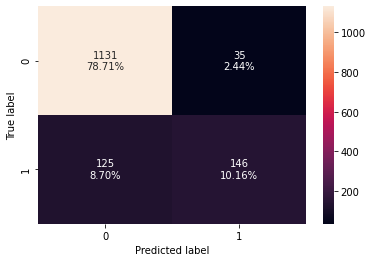

In [136]:
from statistics import mode


bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train, y_train)

confusion_matrix_sklearn(bagging, X_test, y_test)

bagging_train_perf = model_performance_classification_sklearn(bagging, X_train, y_train)
bagging_test_perf = model_performance_classification_sklearn(bagging, X_test, y_test)

bagging_compare = bagging_train_perf.append(bagging_test_perf, ignore_index=True)
bagging_compare.index = ['Bagging Training', 'Bagging Test']

bagging_compare.head()



The model is overfitting the training data, recall and precision notablly are significantly worse on test than training data

In [110]:
# Tuning the Bagging Model

bagging_tuned = BaggingClassifier(random_state=1)

bagging_parameters = {'max_samples': [0.7,0.8,0.9,1], 'max_features': [0.7,0.8,0.9,1], 'n_estimators':[10,20,30,40,50]}

acc_scorer = metrics.make_scorer(metrics.recall_score)

bagging_grid_search = GridSearchCV(bagging_tuned, bagging_parameters, scoring=acc_scorer, cv=5)
bagging_grid_search = bagging_grid_search.fit(X_train, y_train)

bagging_tuned = bagging_grid_search.best_estimator_

bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=20,
                  random_state=1)

,Accuracy,Recall,Precision,F1
Bagging Training,0.990149,0.954114,0.993410,0.973366
Bagging Test,0.888657,0.538745,0.806630,0.646018
Bagging Tunded Training,0.994627,0.971519,1.000000,0.985554
Bagging Tunded Test,0.894224,0.527675,0.856287,0.652968


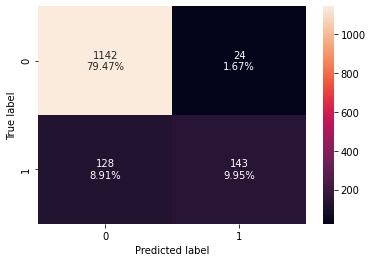

In [137]:
bagging_train_perf_tuned = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagging_test_perf_tuned = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)

bagging_compare = bagging_compare.append(bagging_train_perf_tuned, ignore_index=True)
bagging_compare = bagging_compare.append(bagging_test_perf_tuned, ignore_index=True)
bagging_compare.index = ['Bagging Training', 'Bagging Test', 'Bagging Tunded Training', 'Bagging Tunded Test']

confusion_matrix_sklearn(bagging_tuned, X_test, y_test)

bagging_compare.head()

models are overfitting after tuning as well, Recal and F1 are not good

#### Lets compare the performance of all Bagging Models

In [141]:
bagging_compare_all = dtree_compare.copy()
bagging_compare_all = compare_all.append(rf_compare, ignore_index=False)
bagging_compare_all = compare_all.append(bagging_compare, ignore_index=False)

bagging_compare_all.head(12).T

,DTree Training,DTree Test,DTree Tuned Training,DTree Tuned Test,RF Training,RF Test,RF Tuned Training,RF Tuned Test,Bagging Training,Bagging Test,Bagging Tunded Training,Bagging Tunded Test
Accuracy,1.0,0.864997,0.766866,0.748782,1.0,0.887265,0.999701,0.915101,0.990149,0.888657,0.994627,0.894224
Recall,1.0,0.656827,0.645570,0.634686,1.0,0.479705,0.998418,0.645756,0.954114,0.538745,0.971519,0.527675
Precision,1.0,0.637993,0.422798,0.396313,1.0,0.860927,1.000000,0.870647,0.993410,0.806630,1.000000,0.856287
F1,1.0,0.647273,0.510958,0.487943,1.0,0.616114,0.999208,0.741525,0.973366,0.646018,0.985554,0.652968


### Model Building Boosting  

##### AdaBoost Classifier

,Accuracy,Recall,Precision,F1
AdaBoost Training,0.847463,0.302215,0.731801,0.427772
AdaBoost Test,0.834377,0.287823,0.634146,0.395939


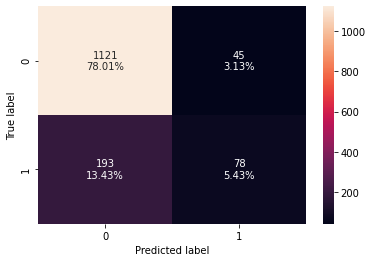

In [169]:
ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)

ab_train_pref = model_performance_classification_sklearn(ab, X_train, y_train)
ab_test_pref = model_performance_classification_sklearn(ab, X_test, y_test)

confusion_matrix_sklearn(ab, X_test, y_test)

ab_compare = ab_train_pref.append(ab_test_pref, ignore_index=True)
ab_compare.index = ['AdaBoost Training', 'AdaBoost Test']

ab_compare.head()

Model is giving very poor Recall and F1 scores

In [146]:
#Tuning AdaBoost

ab_tuned = AdaBoostClassifier(random_state=1)
ab_parameters = {'base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)], 'n_estimators': np.arange(10,110,10), 'learning_rate':np.arange(0.1,2,0.1)}
ab_scorer = metrics.make_scorer(metrics.recall_score)

ab_grid_search = GridSearchCV(ab_tuned, ab_parameters, scoring=ab_scorer, cv=5)
ab_grid_search = ab_grid_search.fit(X_train, y_train)

ab_tuned = ab_grid_search.best_estimator_

ab_tuned.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.6, n_estimators=90, random_state=1)

,Accuracy,Recall,Precision,F1
Ada Boost Training,0.847463,0.302215,0.731801,0.427772
Ada Boost Test,0.834377,0.287823,0.634146,0.395939
Ada Boost Tunded Training,0.964179,0.875000,0.930976,0.902121
Ada Boost Tunded Test,0.859429,0.560886,0.646809,0.600791


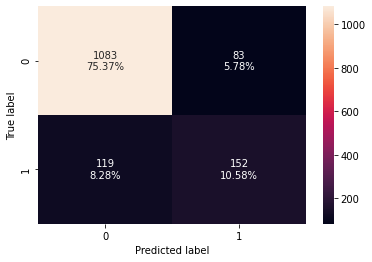

In [170]:
ab_train_perf_tuned = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
ab_test_perf_tuned = model_performance_classification_sklearn(ab_tuned, X_test, y_test)

ab_compare = ab_compare.append(ab_train_perf_tuned, ignore_index=True)
ab_compare = ab_compare.append(ab_test_perf_tuned, ignore_index=True)
ab_compare.index = ['Ada Boost Training', 'Ada Boost Test', 'Ada Boost Tunded Training', 'Ada Boost Tunded Test']

confusion_matrix_sklearn(ab_tuned, X_test, y_test)

ab_compare.head()


##### Gradient Boosting

,Accuracy,Recall,Precision,F1
Gradient Boost Training,0.888657,0.481013,0.871060,0.619776
Gradient Boost Test,0.848295,0.335793,0.705426,0.455000


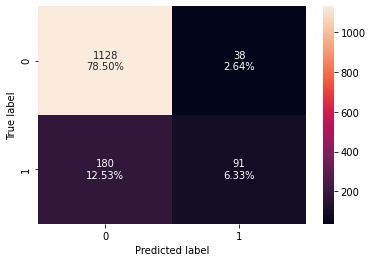

In [179]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

gb_train_perf = model_performance_classification_sklearn(gb, X_train, y_train)
gb_test_perf = model_performance_classification_sklearn(gb, X_test, y_test)

gb_compare = gb_train_perf.append(gb_test_perf, ignore_index=True)
gb_compare.index = ['Gradient Boost Training', 'Gradient Boost Test']

confusion_matrix_sklearn(gb, X_test, y_test)

gb_compare.head()

Recall and F1 are very bad, Precision on test is not great either

In [158]:
# Gradient Boosting Tuning
gb_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
gb_parameters = {'n_estimators': [100,150,200,250], 'subsample':[0.8,0.9,1],'max_features':[0.7,0.8,0.9,1]}

gb_scorer = metrics.make_scorer(metrics.recall_score)

gb_grid_search = GridSearchCV(gb_tuned, gb_parameters, scoring=gb_scorer, cv=5)
gb_grid_search = gb_grid_search.fit(X_train, y_train)

gb_tuned = gb_grid_search.best_estimator_
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

,Accuracy,Recall,Precision,F1
Gradient Boost Training,0.888657,0.481013,0.871060,0.619776
Gradient Boost Test,0.848295,0.335793,0.705426,0.455000
Gradient Boost Tuned Training,0.909552,0.577532,0.910224,0.706680
Gradient Boost Tuned Test,0.861517,0.398524,0.750000,0.520482


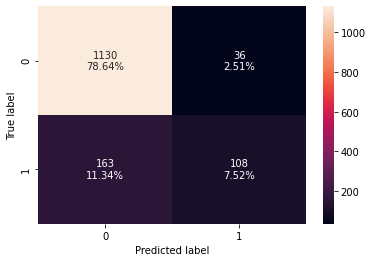

In [180]:
gb_train_perf_tuned = model_performance_classification_sklearn(gb_tuned, X_train, y_train)
gb_test_perf_tuned = model_performance_classification_sklearn(gb_tuned, X_test, y_test)

gb_compare = gb_compare.append(gb_train_perf_tuned, ignore_index=True)
gb_compare = gb_compare.append(gb_test_perf_tuned, ignore_index=True)
gb_compare.index = ['Gradient Boost Training', 'Gradient Boost Test', 'Gradient Boost Tuned Training', 'Gradient Boost Tuned Test']

confusion_matrix_sklearn(gb_tuned, X_test, y_test)

gb_compare.head()

Recall and F1 have slightly improved but the model is overfitting



##### XGBoost Classifier

,Accuracy,Recall,Precision,F1
XG Boost Training,0.996418,0.981013,1.000000,0.990415
XG Boost Test,0.904662,0.619926,0.831683,0.710359


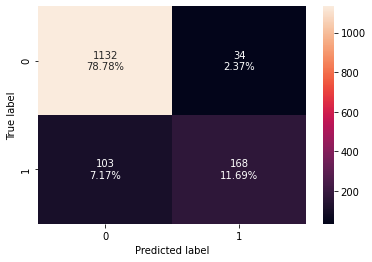

In [183]:
xg = XGBClassifier(random_state = 1, eval_metric = 'error')
xg.fit(X_train, y_train)

confusion_matrix_sklearn(xg, X_test, y_test)

xg_train_perf = model_performance_classification_sklearn(xg, X_train, y_train)
xg_test_perf = model_performance_classification_sklearn(xg, X_test, y_test)

xg_compare = xg_train_perf.append(xg_test_perf, ignore_index=True)
xg_compare.index = ['XG Boost Training','XG Boost Test']

xg_compare.head()

Model is overfitting the data still

In [192]:
# XG Boost Tuning
xg_tuned = XGBClassifier(random_state=1, eval_metric='logloss')
xg_parameters = {"n_estimators": np.arange(10,100,20), "scale_pos_weight":[0,1,2,5], "subsample":[0.5,0.7,0.9,1], "learning_rate":[0.01,0.1,0.2,0.05], "gamma":[0,1,3], "colsample_bytree":[0.5,0.7,0.9,1], "colsample_bylevel":[0.5,0.7,0.9,1]}
xg_scorer = metrics.make_scorer(metrics.recall_score)

xg_grid_search = GridSearchCV(xg_tuned, xg_parameters, scoring=xg_scorer, cv=5)
xg_grid_search = xg_grid_search.fit(X_train, y_train)

xg_tuned = xg_grid_search.best_estimator_

xg_tuned.fit(X_train, y_train)


In [ ]:
xg_train_perf_tuned = model_performance_classification_sklearn(xg_tuned, X_train, y_train)
xg_test_perf_tuned = model_performance_classification_sklearn(xg_tuned, X_test, y_test)

confusion_matrix_sklearn(xg_tuned, X_test, y_test)

xg_compare = xg_compare.append(xg_train_perf_tuned, ignore_index=False)
xg_compare = xg_compare.append(xg_test_perf_tuned, ignore_index=False)
xg_compare.index = ['XG Boost Training', 'XG Boost Test', 'XG Boost Tuned Training', 'XG Boost Tuned Test']

xg_compare.head()


##### Staking Classifier

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gb_tuned), ('Decision Tree',dtree_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

In [ ]:
stacking_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_test)
stacking_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)

confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

stacking_compare = stacking_train_perf.append(stacking_test_perf, ignore_index=True)
stacking_compare.index = ['Stacking Training', 'Stacking Test']

stacking_compare.head()

In [ ]:
# Comparing all Boosting Models

from codecs import ignore_errors


boosting_compare_all = ad_compare.copy()
boosting_compare_all = gb_compare_all.append(gb_compare, ignore_index=False)
boosting_compare_all = xg_compare_all.append(xg_compare, ignore_index=False)
boosting_compare_all = stacking_compare.append(stacking_compare, ignore_index=False)

boosting_compare_all.head(12).T

In [ ]:
compare_all = bagging_compare_all.append(boosting_compare_all, ignore_index=False)
compare_all.head(30)

In [ ]:
# Feature Importance

feature_names = X_train.columns
importances = xg_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Inisghts and Recommendations 
### Bagging
- **Bagging:** The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets.
- **Random Forest:** The difference in accuracy between the two sets is slightly larger here. Recall and F1 both have slightly larger disparities when compared to bagging, precision is roughly the same. The Accuracy between the two sets is decent but there are massive disparities between Reacall and F1 in train and test set. Precision could also be closer betweent the two data sets. With similiarities between the two sets in the shape of the data but baggings predictions closer between train and test it maybe be the better predictor.
- **Decision Tree:** The difference in accuracy between the three sets is even larger here with decision tree having the largest disparity. Recall and F1 both have better disparities when compared to bagging, precision is has the largest disparity of any of the datasets. As the company wants to minimize false postiives so recall is our best metric here. This makes decision tree the best model of the three so far but that doesnt mean its a good one yet. 
- **Tuned Bagging:** Overall performance metrics are not considerably better and our recall has gotten worse
- **Tuned Random Forest:** We can see weve brought the recal between the test and training sets signficantly closer together but neither sets has a good result.
- **Tuned Decision Tree:** Our measures are all very close between the training and test sets. However, recall is def not good. 


### Boosting
- **Adaboost:** The recall on Adaboost is attroucious, Accuracy is ok, Precision is better than recall and F1 but not good.
- **Gradient Boost:** Very similar to Adaboost, Accuracy is strong but precision between train and test has a large disparity and recall is awful.
- **XGBoost:** Recall on the training set is extremely good and the best of the boosting methods so far for both train and test. However the 40% disparity in effectiveness between train and test lets us know something is off here. Accruacy and Precision are both some of the strongest nubmers weve seen. 
- **Stacking:** Stacking has a perforamance closer to XGBoost but is more computational heavy than XGBoost. 
- **Adaboost Tuned:** Numbers are much better but still not better than XGBoost
- **Gradient Boost Tuned:** Our recall is the worst here of all test sets


### Business Recommendations
- Package might be best geared to specific type of customers
- In the past self iniated contact has been the largest group of customers to purchase a product, this will be a good comparison metric to test the effectiveness of our algorthim
- Free Lancers are best left out of targeting all together
- Pitches should never be longer than 15 minutes